In [ ]:
import pandas as pd
import os
import shutil
import time
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/efficientnet/형한결')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
sns.set_theme(style='whitegrid' )

In [ ]:
train_df = pd.read_csv("train_df.csv")
test_df = pd.read_csv("test_df.csv")

In [ ]:
display(f'훈련 데이터 개수 : {len(train_df)}',train_df.head())

'훈련 데이터 개수 : 4277'

,index,file_name,class,state,label
0,0,10000.png,transistor,good,transistor-good
1,1,10001.png,capsule,good,capsule-good
2,2,10002.png,transistor,good,transistor-good
3,3,10003.png,wood,good,wood-good
4,4,10004.png,bottle,good,bottle-good


In [ ]:
display(f'테스트 데이터 개수 : {len(test_df)}',train_df.head())

'테스트 데이터 개수 : 2154'

,index,file_name,class,state,label
0,0,10000.png,transistor,good,transistor-good
1,1,10001.png,capsule,good,capsule-good
2,2,10002.png,transistor,good,transistor-good
3,3,10003.png,wood,good,wood-good
4,4,10004.png,bottle,good,bottle-good


In [ ]:
print(f"class의 수: {len(train_df['class'].unique())}")
print(f"state의 수: {len(train_df['state'].unique())}")
print(f"label의 수: {len(train_df['label'].unique())}")

class의 수: 15
state의 수: 49
label의 수: 88


In [ ]:
train_df['cnt']=1
group_label = train_df.groupby(['class','label'])['cnt'].sum().reset_index().sort_values(['class','cnt'],
                                                              ascending=[True,False])
group_label.head()

,class,label,cnt
3,bottle,bottle-good,209
1,bottle,bottle-broken_small,11
2,bottle,bottle-contamination,11
0,bottle,bottle-broken_large,10
9,cable,cable-good,224


In [ ]:
group_class = group_label.groupby('class')[['class','cnt']].sum().sort_values('cnt',ascending=[False]).reset_index()
group_class.head()

,class,cnt
0,hazelnut,427
1,screw,381
2,pill,340
3,carpet,327
4,zipper,301


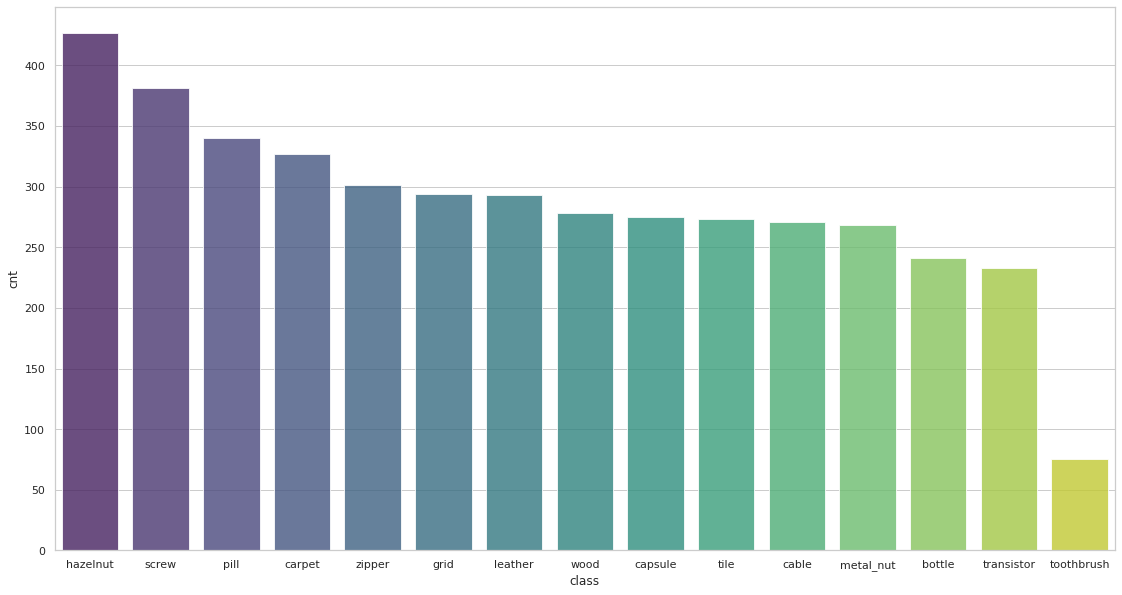

In [ ]:
plt.figure(figsize=(19,10))
sns.barplot(x='class',y='cnt',data=group_class,palette='viridis',alpha=0.8)#viridis

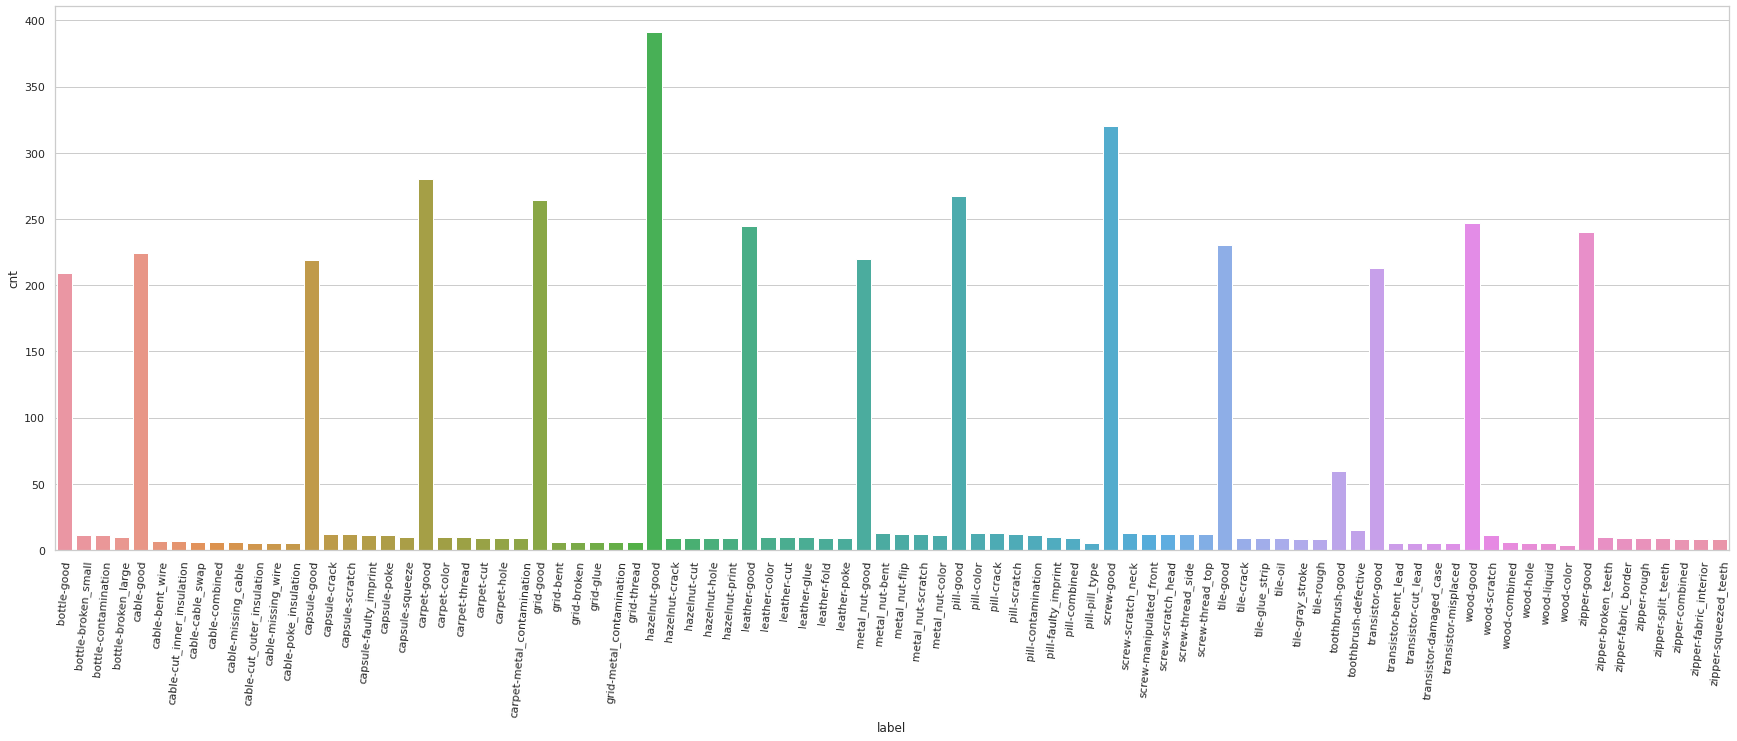

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation='85')
sns.barplot(x='label',y='cnt',data=group_label)